In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pylab as plt
from collections import Counter


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer

In [112]:
df = pd.read_csv("shukei_data_1206.csv")
df

,difficult_avarage,diffi1,diffi2,diffi3,diffi4,diffi5,diffi6,跳躍割合,上向跳躍割合,下降跳躍割合,音域,WPCS,タイの数,音価コスト,テンポ,音価コストとテンポの積,変化割合,ピッチエントロピー,音価エントロピー
0,1.83,2,1,2,1,3.0,2.0,14,8,5,15,1.25,4,5.78,97,560.66,11.6,2.04,1.120
1,1.83,1,1,2,1,3.0,3.0,14,2,11,13,1.31,4,6.15,97,596.55,16.3,2.06,1.080
2,2.17,3,1,2,2,2.0,3.0,24,20,4,9,1.63,4,6.37,97,617.89,14.6,1.65,1.530
3,2.20,1,2,3,3,2.0,NaN,38,27,11,19,1.16,6,4.93,90,443.70,28.0,2.15,0.550
4,2.40,1,2,3,3,3.0,NaN,21,21,0,14,1.22,4,5.69,90,512.10,18.4,2.42,1.080
5,1.60,2,1,2,2,1.0,NaN,18,13,5,16,1.43,8,6.57,90,591.30,24.5,2.10,1.270
6,2.50,2,2,2,4,NaN,NaN,42,0,42,9,1.33,24,4.33,180,779.40,38.8,1.93,0.530
7,3.00,3,3,4,2,NaN,NaN,33,18,15,10,1.37,3,6.10,180,1098.00,25.6,1.98,1.380
8,2.00,3,1,2,2,NaN,NaN,40,22,18,12,1.45,22,4.38,180,788.40,23.4,1.69,0.880
9,2.80,3,3,3,1,4.0,NaN,18,13,5,16,0.99,6,4.33,132,571.56,25.5,2.10,0.735


In [19]:
matplotlib.rcParams.get("font.family")
font = {"family":"IPAexGothic"}
matplotlib.rc('font', **font)
print()

In [107]:
imr = imr.fit(df)
imuted_df=imr.transform(df.values)

In [108]:
df[0:18]
reg_df  = df.loc[:,"跳躍割合":"音価エントロピー"]
reg_df

,跳躍割合,上向跳躍割合,下降跳躍割合,音域,WPCS,タイの数,音価コスト,テンポ,音価コストとテンポの積,変化割合,ピッチエントロピー,音価エントロピー
0,14,8,5,15,1.25,4,5.78,97,560.66,11.6,2.04,1.120
1,14,2,11,13,1.31,4,6.15,97,596.55,16.3,2.06,1.080
2,24,20,4,9,1.63,4,6.37,97,617.89,14.6,1.65,1.530
3,38,27,11,19,1.16,6,4.93,90,443.70,28.0,2.15,0.550
4,21,21,0,14,1.22,4,5.69,90,512.10,18.4,2.42,1.080
5,18,13,5,16,1.43,8,6.57,90,591.30,24.5,2.10,1.270
6,42,0,42,9,1.33,24,4.33,180,779.40,38.8,1.93,0.530
7,33,18,15,10,1.37,3,6.10,180,1098.00,25.6,1.98,1.380
8,40,22,18,12,1.45,22,4.38,180,788.40,23.4,1.69,0.880
9,18,13,5,16,0.99,6,4.33,132,571.56,25.5,2.10,0.735


In [82]:
corr_mat = df.corr(method='kendall')
corr_sp = corr_mat.iloc[:7,7:]
corr_sp

,跳躍割合,上向跳躍割合,下降跳躍割合,音域,WPCS,タイの数,音価コスト,テンポ,音価コストとテンポの積,変化割合,ピッチエントロピー,音価エントロピー
difficult_avarage,0.328775,0.304117,0.233678,-0.195133,0.107774,-0.070438,-0.359374,0.278749,0.114135,0.262699,-0.108490,-0.182470
diffi1,0.297484,0.239448,0.180672,-0.230990,0.384934,0.048304,-0.333243,0.416622,0.329960,0.038493,-0.286744,-0.015448
diffi2,0.214286,0.156614,0.087600,0.072675,-0.257561,-0.073455,-0.235702,0.074536,-0.140028,0.117073,0.149278,-0.172275
diffi3,0.310967,0.456297,0.080008,-0.024338,0.125460,-0.245993,-0.307841,0.216329,0.007816,0.243079,-0.007893,-0.118008
diffi4,0.287081,0.114832,0.147924,-0.307880,0.297580,0.143624,-0.061448,0.056675,0.129290,0.396773,-0.192024,-0.099521
diffi5,-0.177836,-0.052511,0.035857,0.071715,-0.603269,-0.220639,-0.327489,0.342997,-0.155126,0.189599,0.035284,-0.399472
diffi6,0.276699,0.223607,0.264575,-0.115045,0.113389,0.285774,0.000000,-0.043033,0.000000,0.149071,0.074536,0.000000


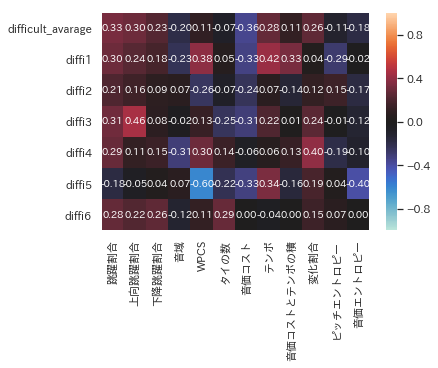

In [93]:

sns.heatmap(corr_sp,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            annot_kws={'size': 10},
            fmt='.2f',
            xticklabels=corr_sp.columns.values,
            yticklabels=corr_mat.columns[0:7].values
           )


plt.show()

C:\Users\match\Miniconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\match\Miniconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


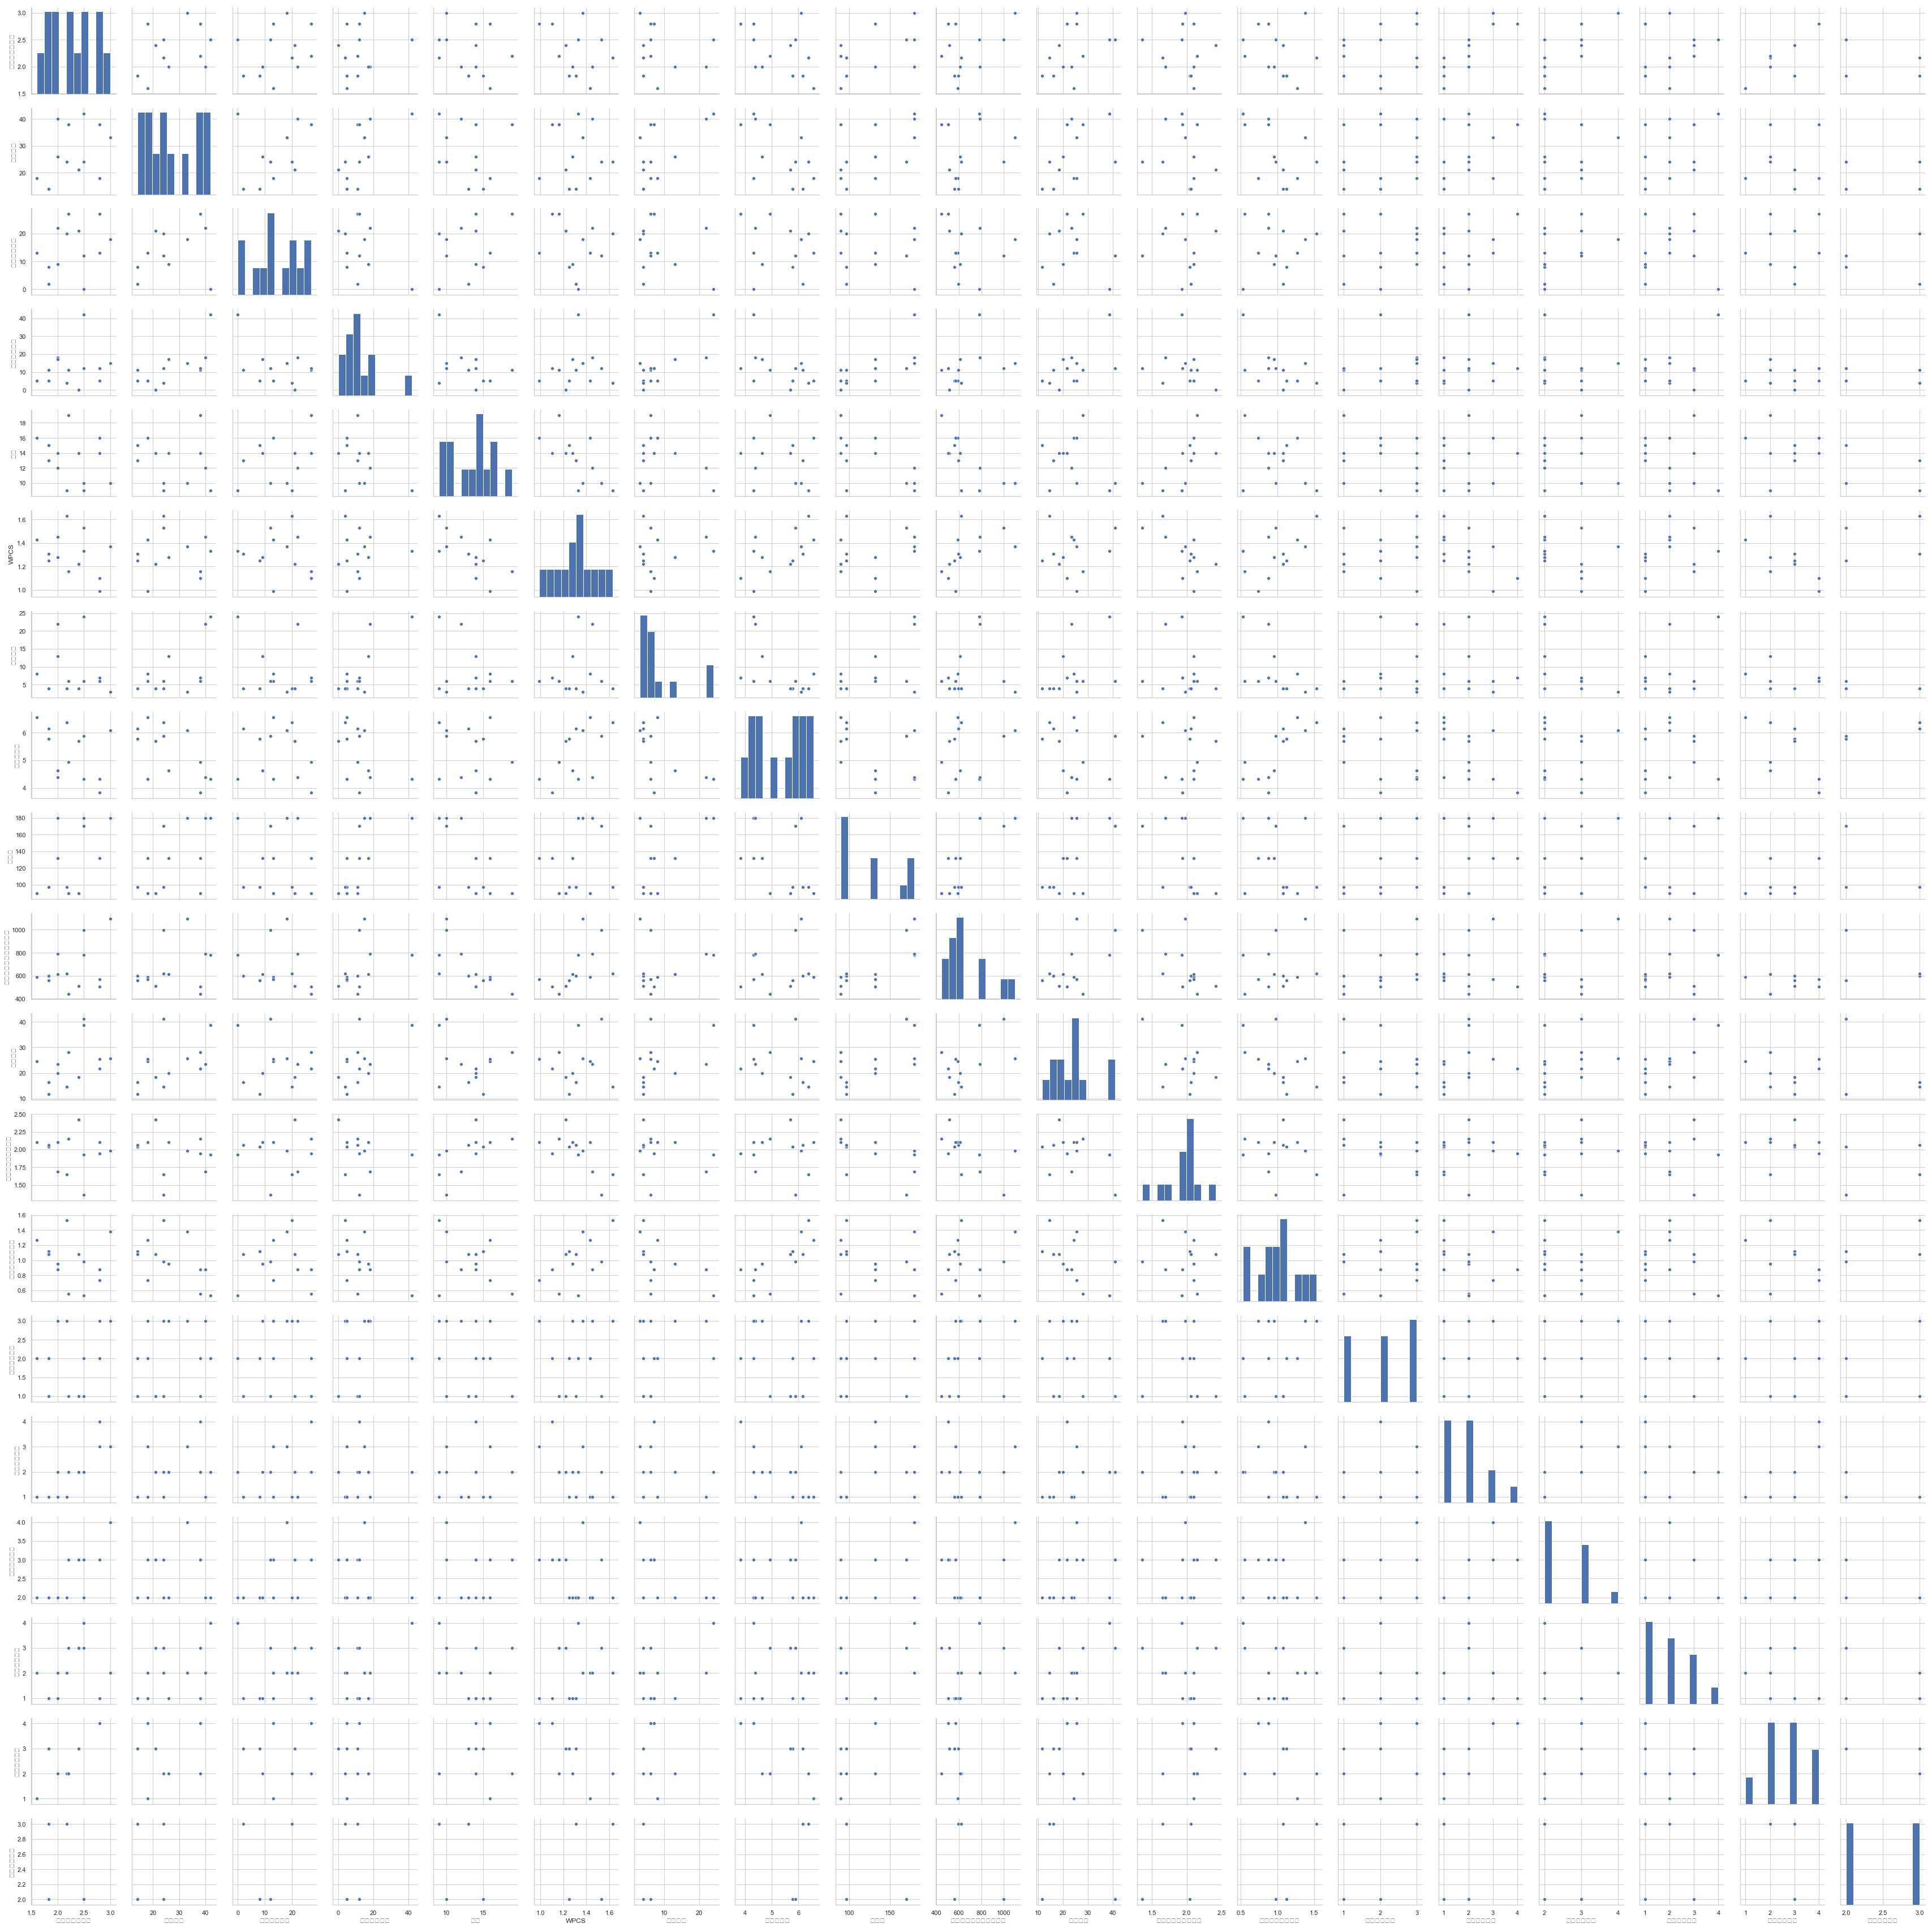

In [15]:
sns.set(style="whitegrid",context="notebook")
sns.pairplot(df[0:13])
plt.show()

In [16]:
lr = LinearRegression()


In [114]:
plt.scatter()


AttributeError: module 'matplotlib.pylab' has no attribute 'absolutescatter'

In [54]:
imr = Imputer(missing_values="NaN",strategy="median",axis=1)